In [ ]:
import h5py


In [ ]:
import h5py

file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"

with h5py.File(file_path, 'r') as f:
    print("최상위 키 목록:", list(f.keys()))

    # 각 키 내부 구조 살펴보기
    for key in f.keys():
        print(f"\n[{key}] 내부 구조:")
        try:
            obj = f[key]
            if isinstance(obj, h5py.Group):
                print("  Group 하위 키:", list(obj.keys()))
            elif isinstance(obj, h5py.Dataset):
                print("  Dataset shape:", obj.shape)
        except Exception as e:
            print("  오류 발생:", e)


In [ ]:
with h5py.File(file_path, 'r') as f:
    print(f['Channel_1'].keys())

In [24]:
import h5py

file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"

with h5py.File(file_path, 'r') as f:
    print("최상위 키 목록:", list(f.keys()))
    
    for key in f.keys():
        print(f"\n🔍 키: {key}")
        obj = f[key]
        print("  타입:", type(obj))
        if isinstance(obj, h5py.Group):
            print("  그룹 내부 키:", list(obj.keys()))
        elif isinstance(obj, h5py.Dataset):
            print("  데이터셋 shape:", obj.shape)
        else:
            print("  다른 타입 또는 참조일 수 있음")

        # 참조 확인
        try:
            val = obj[()]
            print("  추출된 값/참조 타입:", type(val))
        except Exception as e:
            print("  값 접근 실패:", e)


최상위 키 목록: ['#refs#', 'Channel_1', 'Frame']

🔍 키: #refs#
  타입: <class 'h5py._hl.group.Group'>
  그룹 내부 키: ['a']
  값 접근 실패: Accessing a group is done with bytes or str, not <class 'tuple'>

🔍 키: Channel_1
  타입: <class 'h5py._hl.group.Group'>
  그룹 내부 키: ['Data', 'NumPoints', 'NumSegments', 'WaveformType', 'XData', 'XDispOrigin', 'XDispRange', 'XInc', 'XOrg', 'XUnits', 'YDispOrigin', 'YDispRange', 'YInc', 'YOrg', 'YUnits']
  값 접근 실패: Accessing a group is done with bytes or str, not <class 'tuple'>

🔍 키: Frame
  타입: <class 'h5py._hl.group.Group'>
  그룹 내부 키: ['Date', 'Model', 'Serial']
  값 접근 실패: Accessing a group is done with bytes or str, not <class 'tuple'>


In [26]:
def explore_all(f, indent=0):
    for key in f:
        try:
            item = f[key]
            print("  " * indent + f"🔹 {key} → {type(item)}")
            if isinstance(item, h5py.Group):
                explore_all(item, indent + 1)
            elif isinstance(item, h5py.Dataset):
                print("  " * (indent+1) + f"shape: {item.shape}, dtype: {item.dtype}")
        except Exception as e:
            print("  " * indent + f"⚠️ {key} 접근 오류: {e}")

with h5py.File(file_path, 'r') as f:
    explore_all(f)

🔹 #refs# → <class 'h5py._hl.group.Group'>
  🔹 a → <class 'h5py._hl.dataset.Dataset'>
    shape: (2,), dtype: uint64
🔹 Channel_1 → <class 'h5py._hl.group.Group'>
  🔹 Data → <class 'h5py._hl.dataset.Dataset'>
    shape: (1, 5000000), dtype: int16
  🔹 NumPoints → <class 'h5py._hl.dataset.Dataset'>
    shape: (1, 1), dtype: float64
  🔹 NumSegments → <class 'h5py._hl.dataset.Dataset'>
    shape: (1, 1), dtype: float64
  🔹 WaveformType → <class 'h5py._hl.dataset.Dataset'>
    shape: (6, 1), dtype: uint16
  🔹 XData → <class 'h5py._hl.dataset.Dataset'>
    shape: (2,), dtype: uint64
  🔹 XDispOrigin → <class 'h5py._hl.dataset.Dataset'>
    shape: (1, 1), dtype: float64
  🔹 XDispRange → <class 'h5py._hl.dataset.Dataset'>
    shape: (1, 1), dtype: float64
  🔹 XInc → <class 'h5py._hl.dataset.Dataset'>
    shape: (1, 1), dtype: float64
  🔹 XOrg → <class 'h5py._hl.dataset.Dataset'>
    shape: (1, 1), dtype: float64
  🔹 XUnits → <class 'h5py._hl.dataset.Dataset'>
    shape: (6, 1), dtype: uint16
  🔹 

In [30]:
import h5py

file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"

with h5py.File(file_path, "r") as f:
    # 'Channel_1'이 Group인지 확인
    print(f"'Channel_1' 타입:", type(f['Channel_1']))

    # 내부 키 확인
    channel_group = f['Channel_1']
    print("Channel_1 내부 키들:", list(channel_group.keys()))

    # 첫 번째 내부 키 살펴보기
    first_key = list(channel_group.keys())[0]
    print(f"\n▶ 첫 번째 키: {first_key}")
    print("타입:", type(channel_group[first_key]))

    # 데이터셋이면 shape 확인
    if isinstance(channel_group[first_key], h5py.Dataset):
        print("데이터 shape:", channel_group[first_key].shape)
        print("예시 값:", channel_group[first_key][0:5])


'Channel_1' 타입: <class 'h5py._hl.group.Group'>
Channel_1 내부 키들: ['Data', 'NumPoints', 'NumSegments', 'WaveformType', 'XData', 'XDispOrigin', 'XDispRange', 'XInc', 'XOrg', 'XUnits', 'YDispOrigin', 'YDispRange', 'YInc', 'YOrg', 'YUnits']

▶ 첫 번째 키: Data
타입: <class 'h5py._hl.dataset.Dataset'>
데이터 shape: (1, 5000000)
예시 값: [[ -1644  -1208  -1032 ...   6948 -24552 -32736]]


In [44]:
import numpy as np
import h5py

def print_all_datasets(h5group, path="/"):
    for key in h5group:
        item = h5group[key]
        current_path = path + key
        if isinstance(item, h5py.Group):
            # 그룹이면 재귀 탐색
            print_all_datasets(item, current_path + "/")
        elif isinstance(item, h5py.Dataset):
            # 데이터셋이면 출력
            print(f"📁 Dataset: {current_path}")
            print(f"   └ Shape: {item.shape}, Dtype: {item.dtype}")

In [45]:
file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"

with h5py.File(file_path, "r") as f:
    print("🔍 모든 Dataset 목록:")
    print_all_datasets(f)


🔍 모든 Dataset 목록:
📁 Dataset: /#refs#/a
   └ Shape: (2,), Dtype: uint64
📁 Dataset: /Channel_1/Data
   └ Shape: (1, 5000000), Dtype: int16
📁 Dataset: /Channel_1/NumPoints
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/NumSegments
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/WaveformType
   └ Shape: (6, 1), Dtype: uint16
📁 Dataset: /Channel_1/XData
   └ Shape: (2,), Dtype: uint64
📁 Dataset: /Channel_1/XDispOrigin
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/XDispRange
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/XInc
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/XOrg
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/XUnits
   └ Shape: (6, 1), Dtype: uint16
📁 Dataset: /Channel_1/YDispOrigin
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/YDispRange
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/YInc
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Channel_1/YOrg
   └ Shape: (1, 1), Dtype: float64
📁 Dataset: /Ch

In [47]:
with h5py.File(file_path, 'r') as f:
    # 1. 신호 데이터 불러오기
    signal = f['/Channel_1/Data'][0]  # shape: (5000000,)
    
    # 2. 프레임 정보 (라벨처럼 활용할 수도 있음)
    model_raw = f['/Frame/Model'][:]     # uint16 배열
    model_name = ''.join([chr(c[0]) for c in model_raw])  # 문자열로 디코딩
    serial_raw = f['/Frame/Serial'][:]
    serial_name = ''.join([chr(c[0]) for c in serial_raw])  
    print("📈 신호 길이:", signal.shape)
    print("📛 모델명:", model_name)
    print("시리얼 넘버", serial_name)

📈 신호 길이: (5000000,)
📛 모델명: MSOS604A
시리얼 넘버 MY55510227


X축 단위: Second
y축 단위: Volt


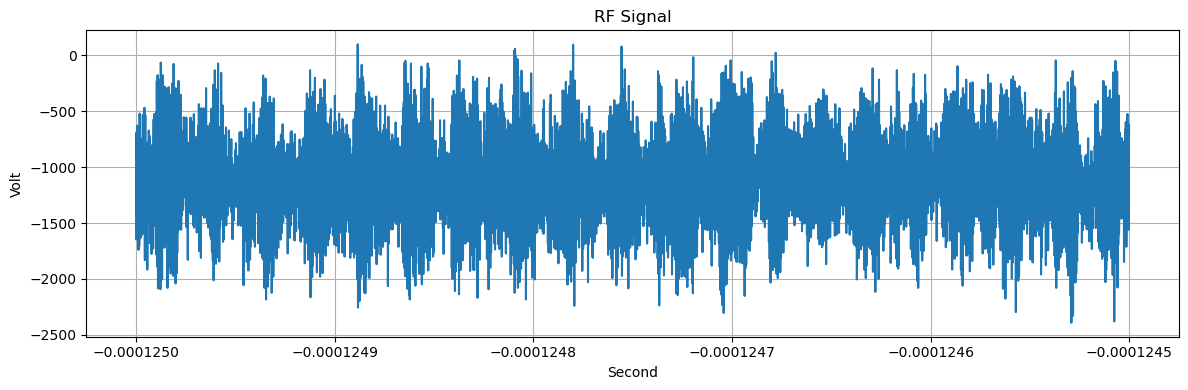

In [71]:
import matplotlib.pyplot as plt

file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"

def drowGraph(file_path):
    with h5py.File(file_path, 'r') as f:
        # Y축 신호 데이터
        y = f['/Channel_1/Data'][0]  # shape: (5000000,)
    
        # X축 설정 값들
        x_origin = f['/Channel_1/XOrg'][0][0]      # float64
        x_inc = f['/Channel_1/XInc'][0][0]         # float64
        x_disp_range = f['/Channel_1/XDispRange'][0][0]  # float64
    
        # X축 시간 벡터 생성
        x = np.arange(len(y)) * x_inc + x_origin
    
        # X 단위 추출
        x_unit_raw = f['/Channel_1/XUnits'][:]  # 예: (6, 1)
        x_unit = ''.join(chr(c[0]) for c in x_unit_raw)
        print("X축 단위:", x_unit)
        y_unit_raw = f['/Channel_1/YUnits'][:]
        y_unit = ''.join(chr(c[0]) for c in y_unit_raw)
        print("y축 단위:",y_unit)
    # 시각화 (앞부분만)
    plt.figure(figsize=(12, 4))
    plt.plot(x[:10000], y[:10000])
    plt.title("RF Signal")
    plt.xlabel(x_unit)
    plt.ylabel(y_unit)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

drowGraph(file_path)

In [87]:
file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\DJI_MAVICPRO\HOVERING\MAVICPRO_10M_HOVERING00004.mat"
f = h5py.File(file_path, 'r')
x_unit_raw = f['/Channel_1/XUnits'][:]
x_unit = ''.join([chr(c[0]) for c in x_unit_raw])
print(x_unit)

Second


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\DJI_MAVICPRO\HOVERING\MAVICPRO_10M_HOVERING00004.mat"
file_path = file_path.replace("\\", "/")

with h5py.File(file_path, 'r') as f:
    # Y축 신호 데이터
    data = np.array(f['/Channel_1/Data'][:])  # shape: (5000000,)
    yinc = np.array(f['/Channel_1/YInc'][:])
    yorg = np.array(f['/Channel_1/YOrg'][:])
    y = yinc * data + yorg
    print("y", y)
    x_origin = np.array(f['/Channel_1/XOrg'][:])      # float64
    x_inc = np.array(f['/Channel_1/XInc'][:])         # float64
    #x_disp_range = f['/Channel_1/XDispRange'][0][0]  # float64

    # X축 시간 벡터 생성
    x = np.arange(len(data[0])) * x_inc + x_origin
    print("x", x)
    # X 단위 추출
    x_unit_raw = f['/Channel_1/XUnits'][:]  # 예: (6, 1)
    x_unit = ''.join(chr(c[0]) for c in x_unit_raw)
    print("X축 단위:", x_unit)
    y_unit_raw = f['/Channel_1/YUnits'][:]
    y_unit = ''.join(chr(c[0]) for c in y_unit_raw)
    print("y축 단위:",y_unit)
# 시각화 (앞부분만)
plt.figure(figsize=(12, 4))
plt.plot(x[:10000], y[:10000])
plt.title("RF Signal")
plt.xlabel(x_unit)
plt.ylabel(y_unit)
plt.grid(True)
plt.tight_layout()
plt.show()

y [[ 0.05859865  0.2089009   0.2089009  ... -0.2089009  -0.09180894
   0.09057113]]
x [[-0.000125 -0.000125 -0.000125 ...  0.000125  0.000125  0.000125]]
X축 단위: Second
y축 단위: Volt


In [ ]:
def to_string(x):
    decode_str = ''.join(chr(c[0]) for c in x)
    return decode_str

file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"
file_path = file_path.replace("\\", "/")
print(file_path)
f = h5py.File(file_path, 'r')
fc = f['Channel_1']

data = np.array(fc['Data'][:].flatten(), dtype=np.float64) #array([ -1644.,  -1208.,  -1032., ...,   6948., -24552., -32736.])
numPoint = np.array(fc['NumPoints'][0][0], dtype=np.float64) # array(5000000.)
numSegment = np.array(fc['NumSegments'][0][0], dtype=np.float64) # array(0.)
waveFromType = np.array(to_string(fc['WaveformType'][:])) # array('NORMAL', dtype='<U6') 

# x
XData = np.array(fc['XData'], dtype=np.float64) # array([0., 0.])
XDisOrigin = np.array(fc['XDispOrigin'][0][0], dtype=np.float64) # array(-0.0005)
XDisRange = np.array(fc['XDispRange'][0][0], dtype=np.float64) # array(0.001)
XInc = np.array(fc['XInc'][0][0], dtype=np.float64) # array(5.e-11)
XOrg= np.array(fc['XOrg'][0][0], dtype=np.float64) # array(-0.000125)
XUnits = np.array(to_string(fc['XUnits'])) # array('Second', dtype='<U6')

# y
YDisOrigin = np.array(fc['YDispOrigin'][0][0], dtype=np.float64) # array(-0.0005) # array(0.)
YDisRange = np.array(fc['YDispRange'][0][0], dtype=np.float64) # array(0.40000001)
YInc = np.array(fc['YInc'][0][0], dtype=np.float64) # array(6.58411815e-06)
YOrg= np.array(fc['YOrg'][0][0], dtype=np.float64) # array(0.00663679)
YUnits = np.array(to_string(fc['YUnits'])) # array('Volt', dtype='<U4')


#return 값들
data = data.reshape(1, -1)
data_ch = { 'NumPoints': [numPoint], 'NumSegments': [numSegment], 'WaveformType':[waveFromType]}
data_xy = { 'XDisOrigin': [XDisOrigin], 'XDisRange': [XDisRange], 'XInc': [XInc], 'XOrg':[XOrg], 'XUnits': [XUnits], 'YDisOrigin':[YDisOrigin], 'YDisRange':[YDisRange], 'YInc': [YInc], 'YOrg':[YOrg], 'YUnits': [YUnits]}


In [ ]:
file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"
file_path = file_path.replace("\\", "/")
print(file_path)
f = h5py.File(file_path, 'r')
ff = f['Frame']

date = np.array(to_string(ff['Date'])) # array('29-Aug-2020  2:32:50', dtype='<U20')
model = np.array(to_string(ff['Model'])) # array('MSOS604A', dtype='<U8')
serial = np.array(to_string(ff['Serial']))
frame = {'Date': [date], 'Model':[model], 'Serial':[serial]}

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

def to_string(x):
    decode_str = ''.join(chr(c[0]) for c in x)
    return decode_str

def h5pyToData(file_path):
    with h5py.File(file_path, 'r') as f:
        fc = f['Channel_1']
        ff = f['Frame']

        # Channel_1
        data = np.array(fc['Data'][:].flatten(), dtype=np.float64) #array([ -1644.,  -1208.,  -1032., ...,   6948., -24552., -32736.])
        numPoint = np.array(fc['NumPoints'][0][0], dtype=np.float64) # array(5000000.)
        numSegment = np.array(fc['NumSegments'][0][0], dtype=np.float64) # array(0.)
        waveFromType = np.array(to_string(fc['WaveformType'][:])) # array('NORMAL', dtype='<U6') 
        
            # x
        XData = np.array(fc['XData'], dtype=np.float64) # array([0., 0.])
        XDisOrigin = np.array(fc['XDispOrigin'][0][0], dtype=np.float64) # array(-0.0005)
        XDisRange = np.array(fc['XDispRange'][0][0], dtype=np.float64) # array(0.001)
        XInc = np.array(fc['XInc'][0][0], dtype=np.float64) # array(5.e-11)
        XOrg= np.array(fc['XOrg'][0][0], dtype=np.float64) # array(-0.000125)
        XUnits = np.array(to_string(fc['XUnits'])) # array('Second', dtype='<U6')
        
            # y
        YDisOrigin = np.array(fc['YDispOrigin'][0][0], dtype=np.float64) # array(-0.0005) # array(0.)
        YDisRange = np.array(fc['YDispRange'][0][0], dtype=np.float64) # array(0.40000001)
        YInc = np.array(fc['YInc'][0][0], dtype=np.float64) # array(6.58411815e-06)
        YOrg= np.array(fc['YOrg'][0][0], dtype=np.float64) # array(0.00663679)
        YUnits = np.array(to_string(fc['YUnits'])) # array('Volt', dtype='<U4')
        
        # Frame
        date = np.array(to_string(ff['Date'])) # array('29-Aug-2020  2:32:50', dtype='<U20')
        model = np.array(to_string(ff['Model'])) # array('MSOS604A', dtype='<U8')
        serial = np.array(to_string(ff['Serial']))

         # return 값들
        data = data.reshape(1, -1)
        data_ch = { 'NumPoints': [numPoint], 'NumSegments': [numSegment], 'WaveformType':[waveFromType]}
        data_xy = { 'XDisOrigin': [XDisOrigin], 'XDisRange': [XDisRange], 'XInc': [XInc], 'XOrg':[XOrg], 'XUnits': [XUnits], 'YDisOrigin':[YDisOrigin], 'YDisRange':[YDisRange], 'YInc': [YInc], 'YOrg':[YOrg], 'YUnits': [YUnits]}
        frame = {'Date': [date], 'Model':[model], 'Serial':[serial]}
    return [data, data_ch, data_xy, frame]



In [161]:
file_path = r"C:\AIEEE\DATASET\CARDRF\LOS\Test\UAV\BEEBEERUN\FLYING\BEEBEERUN_0000100002.mat"
file_path = file_path.replace("\\", "/")
print(file_path)

data, data_ch, data_xy, frame = h5pyToData(file_path)
df = pd.DataFrame(data)
df_ch = pd.DataFrame(data_ch)
df_xy = pd.DataFrame(data_xy)
frame = pd.DataFrame(frame)

C:/AIEEE/DATASET/CARDRF/LOS/Test/UAV/BEEBEERUN/FLYING/BEEBEERUN_0000100002.mat


In [162]:
df.iloc[:, :100]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1644.0,-1208.0,-1032.0,-924.0,-688.0,-828.0,-1328.0,-1564.0,-1532.0,-1464.0,...,-1524.0,-1052.0,-696.0,-532.0,-860.0,-1468.0,-1504.0,-1264.0,-1448.0,-1436.0


In [163]:
df_ch

,NumPoints,NumSegments,WaveformType
0,5000000.0,0.0,NORMAL


In [164]:
df_xy

,XDisOrigin,XDisRange,XInc,XOrg,XUnits,YDisOrigin,YDisRange,YInc,YOrg,YUnits
0,-0.0005,0.0010000000474974513,5e-11,-0.00012499998813211277,Second,0.0,0.4000000059604645,6.584118146999161e-06,0.006636791092175154,Volt


In [156]:
frame

,Date,Model,Serial
0,29-Aug-2020 2:32:50,MSOS604A,MY55510227
